## Estadísitica Aplicada
## MODELOS DE SUPERVIVENCIA

Nombres y matriculas:

Néstor Geovanni Aguilar Coronado - 1724807

Cecilia Sarahí Gutiérrez Padilla - 1953437

Adrián Ramírez Aguirre - 1912750

Gabriel Antonio Reyes Mayo - 1958790

Itzel Zavala Acosta - 1964493

Grupo: 43

Equipo: Ekuipo dinamita escuadrón alfa buena onda

In [125]:
## Librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
## Liberías especializadas
from lifelines import KaplanMeierFitter, CoxPHFitter, ExponentialFitter, WeibullFitter, LogNormalFitter, WeibullAFTFitter, LogNormalAFTFitter
from lifelines.statistics import logrank_test
import seaborn as sns

In [127]:
## Datos
creditos_bil = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')
creditos_bil

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,sin_cuenta,12,pago_algun_credito,mobiliario,1736,menor_100,4_a_7,3,mujer_no_soltera,NaN,...,bienes_raices,31,NaN,propia,1,obrero,1,0,1,1
996,menor_a_cero,30,pago_algun_credito,coche_usado,3857,menor_100,1_a_4,4,hombre_divorciado,NaN,...,seguro_vida,40,NaN,propia,1,administrativo,1,1,1,1
997,sin_cuenta,12,pago_algun_credito,TV,804,menor_100,mas_de_7,4,hombre_soltero,NaN,...,otro_tipo,38,NaN,propia,1,gobierno,1,0,1,1
998,menor_a_cero,45,pago_algun_credito,TV,1845,menor_100,1_a_4,4,hombre_soltero,NaN,...,sin_activos,23,NaN,prestada,1,gobierno,1,1,1,0


# **Introducción.**

El Banco de la Ilusión (BIL), consciente de la importancia de mantener una gestión de riesgos efectiva, ha reconocido la necesidad de revisar sus políticas de otorgamiento de préstamos. En respuesta a esta necesidad, se ha designado un análisis exhaustivo de la situación, y tu responsabilidad es llevar a cabo un análisis integral sobre la situación. De esta manera se nos ha otorgado una base de datos proporcionada por el banco, que detalla información específica sobre los créditos y préstamos otorgados a diversos clientes con el objetivo de llevar a cabo el análisis integral. Por lo que este análisis integral tiene como objetivo identificar áreas de mejora y optimización en las políticas de préstamos del BIL.

**¿Qué mide?**
En el contexto del análisis de supervivencia realizado para el Banco de la Ilusión, se está midiendo la duración del tiempo que transcurre hasta que ocurre un evento específico. En este caso, el evento de interés es el pago completo del préstamo por parte de los clientes. La variable que captura esta duración en el conjunto de datos es la variable **"meses"**, que representa el número de meses que un cliente tarda en completar el pago del préstamo.

**¿Cuál es el evento?**
El evento de interés en este análisis es el pago completo del préstamo. Se utiliza la variable **"crédito_pagado"**, que toma el valor de 1 si el cliente ha pagado completamente el préstamo y 0 si no lo ha hecho o aún no ha terminado de pagar. Cuando esta variable alcanza el valor de 1, se considera que el evento ha ocurrido.

**¿Qué tiempo es el que se mide?**
El tiempo que se mide es el que transcurre desde un punto de referencia hasta que se produce el evento de interés. En este caso, el tiempo se mide en meses y está representado por la variable **"meses"** en la base de datos. Cada observación en esta indica cuántos meses han pasado desde el inicio hasta que el cliente ha completado el pago del préstamo o hasta que se haya registrado el estado actual (censura).


**2. Comenta quien podría estar interesado en el análisis de supervivencia de tu base de datos, y por qué consideras importante realizar un modelo de supervivencia para tu base de datos (¿qué nos permite conocer o saber?)**

El análisis de supervivencia de la base de datos del Banco de la Ilusión (BIL) puede resultar de gran interés para diversas partes interesadas, cada una con motivaciones específicas basadas en su relación con la institución financiera y sus objetivos. Entre algunos grupos que podrían encontrar valioso este análisis y las razones detrás de su interés se encuentran:

* Gestión Interna del Banco:

**Interés:** La administración del BIL podría estar particularmente interesada en comprender la eficacia de sus políticas de préstamos y la capacidad de los clientes para cumplir con sus obligaciones financieras.\
**Importancia:** Un modelo de supervivencia permitiría identificar patrones de comportamiento en el tiempo, revelando cuánto tiempo tardan los clientes en saldar completamente sus préstamos y proporcionando información valiosa sobre la probabilidad de incumplimiento en diferentes etapas del proceso de pago. Esto permitiría ajustar estrategias internas y políticas de riesgo para mejorar la salud financiera del banco.

* Inversionistas y Accionistas:

**Interés:** Los inversionistas y accionistas del BIL estarían interesados en evaluar la estabilidad y sostenibilidad financiera de la institución.\
**Importancia:** Un modelo de supervivencia proporcionaría una visión más clara de los riesgos asociados con la cartera crediticia, permitiendo a los inversionistas evaluar de manera más precisa el rendimiento financiero y tomar decisiones informadas sobre sus inversiones.

* Reguladores Financieros:

**Interés:** Los reguladores financieros podrían estar interesados en garantizar la solidez y la integridad del sistema financiero.\
**Importancia:** Un análisis de supervivencia permitiría evaluar la conformidad del BIL con las regulaciones financieras y revelar posibles áreas de mejora en términos de gestión de riesgos y prácticas crediticias.

**3. Comenta si tu base de datos posee censura (y en tu caso qué significa la censura para tu base de datos en particular).**

En la base de datos del Banco de la Ilusión (BIL), la censura podría manifestarse en aquellos clientes que aún no han saldado completamente su préstamo al momento de recopilar los datos. En términos prácticos, esto se reflejaría en la variable "crédito_pagado" que toma el valor de 0, indicando que el préstamo no ha sido completamente pagado. Vemos que cuando mostramos la base de datos el segundo y quinto cliente no han terminado de pagar el préstamo.

La presencia de censura en la base de datos del BIL es significativa ya que permite modelar no solo los eventos completos (clientes que han pagado completamente sus préstamos) sino también las situaciones en las que el evento aún no ha ocurrido o no se ha registrado. Un modelo de supervivencia, en este caso, sería esencial para analizar y prever el tiempo hasta que los clientes salden sus préstamos, teniendo en cuenta tanto los eventos ocurridos como la información censurada.

# **Desarrollo.**

### **4. Conviertelas variables categóricasa dummies.**

In [128]:
## Verificar que las variables sean numéricas
creditos_bil.dtypes

saldo_cuenta               object
meses                       int64
historia_crediticia        object
uso                        object
cantidad                    int64
saldo_cuenta_ahorro        object
años_trabajando            object
tasa_de_interes             int64
genero_estado_civil        object
aval                       object
años_actual_domicilio       int64
activos                    object
edad                        int64
planes_de_pago             object
casa                       object
numero_creditos             int64
situacion_laboral          object
dependientes_economicos     int64
telefono                    int64
extranjero                  int64
credito_pagado              int64
dtype: object

In [129]:
## Verificar missing values (valores perdidos)
creditos_bil.isnull().sum()

saldo_cuenta                 0
meses                        0
historia_crediticia          0
uso                          0
cantidad                     0
saldo_cuenta_ahorro        183
años_trabajando              0
tasa_de_interes              0
genero_estado_civil          0
aval                       948
años_actual_domicilio        0
activos                      0
edad                         0
planes_de_pago             814
casa                         0
numero_creditos              0
situacion_laboral            0
dependientes_economicos      0
telefono                     0
extranjero                   0
credito_pagado               0
dtype: int64

In [130]:
## Vamos imputar los missing values
creditos_bil['saldo_cuenta_ahorro'] = creditos_bil['saldo_cuenta_ahorro'].fillna(creditos_bil['saldo_cuenta_ahorro'].mode()[0])
creditos_bil['aval'] = creditos_bil['aval'].fillna('no_aval')
creditos_bil['planes_de_pago'] = creditos_bil['planes_de_pago'].fillna(creditos_bil['planes_de_pago'].mode()[0])

## Verificamos que no hayan missing values
creditos_bil.isnull().sum()

saldo_cuenta               0
meses                      0
historia_crediticia        0
uso                        0
cantidad                   0
saldo_cuenta_ahorro        0
años_trabajando            0
tasa_de_interes            0
genero_estado_civil        0
aval                       0
años_actual_domicilio      0
activos                    0
edad                       0
planes_de_pago             0
casa                       0
numero_creditos            0
situacion_laboral          0
dependientes_economicos    0
telefono                   0
extranjero                 0
credito_pagado             0
dtype: int64

In [131]:
## Verificar duplicated values (valores duplicados)
creditos_bil.duplicated().sum()

0

In [132]:
## Verificar que las variables sean numéricas
creditos_bil.dtypes

saldo_cuenta               object
meses                       int64
historia_crediticia        object
uso                        object
cantidad                    int64
saldo_cuenta_ahorro        object
años_trabajando            object
tasa_de_interes             int64
genero_estado_civil        object
aval                       object
años_actual_domicilio       int64
activos                    object
edad                        int64
planes_de_pago             object
casa                       object
numero_creditos             int64
situacion_laboral          object
dependientes_economicos     int64
telefono                    int64
extranjero                  int64
credito_pagado              int64
dtype: object

In [133]:
## Convertir las variables categoricas en dummies
dummies_sc = pd.get_dummies(creditos_bil['saldo_cuenta'], prefix='sc').astype(int)
dummies_hc = pd.get_dummies(creditos_bil['historia_crediticia'], prefix='hc').astype(int)
dummies_uso = pd.get_dummies(creditos_bil['uso'], prefix='uso').astype(int)
dummies_sca = pd.get_dummies(creditos_bil['saldo_cuenta_ahorro'], prefix='sca').astype(int)
dummies_at = pd.get_dummies(creditos_bil['años_trabajando'], prefix='at').astype(int)
dummies_gec = pd.get_dummies(creditos_bil['genero_estado_civil'], prefix='gec').astype(int)
dummies_aval = pd.get_dummies(creditos_bil['aval'], prefix='aval').astype(int)
dummies_activos = pd.get_dummies(creditos_bil['activos'], prefix='activos').astype(int)
dummies_pdp = pd.get_dummies(creditos_bil['planes_de_pago'], prefix='pdp').astype(int)
dummies_casa = pd.get_dummies(creditos_bil['casa'], prefix='casa').astype(int)
dummies_sl = pd.get_dummies(creditos_bil['situacion_laboral'], prefix='sl').astype(int)

In [ ]:
dummies_sc

In [ ]:
dummies_hc

In [ ]:
dummies_uso

In [ ]:
dummies_sca

In [ ]:
dummies_at

In [ ]:
dummies_gec

In [ ]:
dummies_aval

In [ ]:
dummies_activos

In [ ]:
dummies_pdp

In [ ]:
dummies_casa

In [ ]:
dummies_sl

In [145]:
# Ingresamos las dummies a la base de datos

## Conservamos n-1 dummies de saldo_cuenta, dejamos fuera sc_sin_cuenta
dummies_sc = dummies_sc.drop('sc_sin_cuenta', axis=1)
creditos_bil = pd.concat([creditos_bil, dummies_sc], axis=1)
creditos_bil = creditos_bil.drop('saldo_cuenta', axis=1)

## Conservamos n-1 dummies de historia_crediticia, dejamos fuera hc_sin_creditos
dummies_hc = dummies_hc.drop('hc_sin_creditos', axis=1)
creditos_bil = pd.concat([creditos_bil, dummies_hc], axis=1)
creditos_bil = creditos_bil.drop('historia_crediticia', axis=1)

## Conservamos n-1 dummies de uso, dejamos fuera sc_sin_cuenta
dummies_uso = dummies_uso.drop('uso_utensilios_hogar', axis=1)
creditos_bil = pd.concat([creditos_bil, dummies_uso], axis=1)
creditos_bil = creditos_bil.drop('uso', axis=1)

## Conservamos n-1 dummies de saldo_cuenta_ahorro, dejamos fuera sca_menor_100
dummies_sca = dummies_sca.drop('sca_menor_100', axis=1)
creditos_bil = pd.concat([creditos_bil, dummies_sca], axis=1)
creditos_bil = creditos_bil.drop('saldo_cuenta_ahorro', axis=1)

## Conservamos n-1 dummies de años_trabajando, dejamos fuera at_menor_a_1
dummies_at = dummies_at.drop('at_menor_a_1', axis=1)
creditos_bil = pd.concat([creditos_bil, dummies_at], axis=1)
creditos_bil = creditos_bil.drop('años_trabajando', axis=1)

## Conservamos n-1 dummies de genero_estado_civil, dejamos fuera gec_mujer_no_soltera
dummies_gec = dummies_gec.drop('gec_mujer_no_soltera', axis=1)
creditos_bil = pd.concat([creditos_bil, dummies_gec], axis=1)
creditos_bil = creditos_bil.drop('genero_estado_civil', axis=1)

## Conservamos n-1 dummies de aval, dejamos fuera aval_no_aval
dummies_aval = dummies_aval.drop('aval_no_aval', axis=1)
creditos_bil = pd.concat([creditos_bil, dummies_aval], axis=1)
creditos_bil = creditos_bil.drop('aval', axis=1)

## Conservamos n-1 dummies de activos, dejamos fuera activos_sin_activos
dummies_activos = dummies_activos.drop('activos_sin_activos', axis=1)
creditos_bil = pd.concat([creditos_bil, dummies_activos], axis=1)
creditos_bil = creditos_bil.drop('activos', axis=1)

## Conservamos n-1 dummies de planes_de_pago, dejamos fuera pdp_departamental
dummies_pdp = dummies_pdp.drop('pdp_departamental', axis=1)
creditos_bil = pd.concat([creditos_bil, dummies_pdp], axis=1)
creditos_bil = creditos_bil.drop('planes_de_pago', axis=1)

## Conservamos n-1 dummies de casa, dejamos fuera casa_renta
dummies_casa = dummies_casa.drop('casa_renta', axis=1)
creditos_bil = pd.concat([creditos_bil, dummies_casa], axis=1)
creditos_bil = creditos_bil.drop('casa', axis=1)

## Conservamos n-1 dummies de situacion_laboral, dejamos fuera sl_desempleado
dummies_sl = dummies_sl.drop('sl_desempleado', axis=1)
creditos_bil = pd.concat([creditos_bil, dummies_sl], axis=1)
creditos_bil = creditos_bil.drop('situacion_laboral', axis=1)

### **5. Cercióratede  no  tener  missing  valueso  valores  repetidos,  en  caso  de tenerlos corrige la base de datos.**

In [146]:
## Verificar missing values (valores perdidos)
creditos_bil.isnull().sum()

meses                      0
cantidad                   0
tasa_de_interes            0
años_actual_domicilio      0
edad                       0
numero_creditos            0
dependientes_economicos    0
telefono                   0
extranjero                 0
credito_pagado             0
sc_cero_a_200              0
sc_mas_de_200              0
sc_menor_a_cero            0
hc_no_ha_pagado            0
hc_pago_algun_credito      0
hc_pago_retrasado          0
hc_pago_todos              0
uso_TV                     0
uso_coche_nuevo            0
uso_coche_usado            0
uso_colegiaturas           0
uso_mobiliario             0
uso_otros                  0
uso_poner_negocio          0
uso_reestructuración       0
uso_reparaciones           0
sca_100_a_500              0
sca_500_a_1000             0
sca_mas_de_1000            0
at_1_a_4                   0
at_4_a_7                   0
at_desempleado             0
at_mas_de_7                0
gec_hombre_divorciado      0
gec_hombre_sol

In [147]:
## Verificar duplicated values (valores duplicados)
creditos_bil.duplicated().sum()

0

In [148]:
## Verificar que las variables sean numéricas
creditos_bil.dtypes

meses                      int64
cantidad                   int64
tasa_de_interes            int64
años_actual_domicilio      int64
edad                       int64
numero_creditos            int64
dependientes_economicos    int64
telefono                   int64
extranjero                 int64
credito_pagado             int64
sc_cero_a_200              int32
sc_mas_de_200              int32
sc_menor_a_cero            int32
hc_no_ha_pagado            int32
hc_pago_algun_credito      int32
hc_pago_retrasado          int32
hc_pago_todos              int32
uso_TV                     int32
uso_coche_nuevo            int32
uso_coche_usado            int32
uso_colegiaturas           int32
uso_mobiliario             int32
uso_otros                  int32
uso_poner_negocio          int32
uso_reestructuración       int32
uso_reparaciones           int32
sca_100_a_500              int32
sca_500_a_1000             int32
sca_mas_de_1000            int32
at_1_a_4                   int32
at_4_a_7  

In [149]:
## Base de datos depurada
creditos_bil

,meses,cantidad,tasa_de_interes,años_actual_domicilio,edad,numero_creditos,dependientes_economicos,telefono,extranjero,credito_pagado,...,aval_aval,activos_bienes_raices,activos_otro_tipo,activos_seguro_vida,pdp_bancario,casa_prestada,casa_propia,sl_administrativo,sl_gobierno,sl_obrero
0,6,1169,4,4,67,2,1,1,1,1,...,0,1,0,0,1,0,1,0,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,1,1,...,0,1,0,0,1,0,1,0,0,1
3,42,7882,2,4,45,1,2,0,1,1,...,1,0,0,1,1,1,0,0,1,0
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,1,1,...,0,1,0,0,1,0,1,0,0,1
996,30,3857,4,4,40,1,1,1,1,1,...,0,0,0,1,1,0,1,1,0,0
997,12,804,4,4,38,1,1,0,1,1,...,0,0,1,0,1,0,1,0,1,0
998,45,1845,4,4,23,1,1,1,1,0,...,0,0,0,0,1,1,0,0,1,0


### **6. Calcula las estadísticas descriptivas de las variables.**

In [150]:
## Estadísticas descriptivas
BIL.describe()

,meses,cantidad,tasa_de_interes,años_actual_domicilio,edad,numero_creditos,dependientes_economicos,telefono,extranjero,credito_pagado
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.404000,0.963000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.490943,0.188856,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000


**meses**: La duración del crédito en meses varía desde un mínimo de 4 meses hasta un máximo de 72 meses. La media (promedio) de la duración es de aproximadamente 20.9 meses, y el 50% de los datos tienen una duración de 18 meses o menos.

**cantidad**: El monto del crédito varía desde 250 hasta 18,424 euros. La media de la cantidad del crédito es de aproximadamente 3271.26 euros. El 50% de los datos tienen una cantidad de crédito de 2319.5 euros o menos.

**tasa_de_interes**: La tasa de interés varía desde 1 hasta 4. La media de la tasa de interés es de aproximadamente 2.97.

**años_actual_domicilio**: El tiempo en años que la persona ha vivido en su domicilio actual varía desde 1 hasta 4 años. La media es de aproximadamente 2.85 años.

**edad**: La edad de los clientes varía desde 19 hasta 75 años. La media de la edad es de aproximadamente 35.55 años.

**numero_creditos**: El número de créditos varía desde 1 hasta 4. La media es de aproximadamente 1.41.

**dependientes_economicos**: La cantidad de dependientes económicos varía desde 1 hasta 2. La media es de aproximadamente 1.16.

**telefono**: Variable binaria que indica si la persona tiene u otorgó teléfono o no. La media sugiere que alrededor del 40.4% de las personas no tienen o no otorgaron teléfono.

**extranjero**: Variable binaria que indica si la persona es extranjera o no. La media sugiere que aproximadamente el 96.3% de las personas no son extranjeras.

**credito_pagado**: La media sugiere que aproximadamente el 70% de los créditos han sido pagados.

### **7. Calcula lo siguiente:**

**a) Cuantas variables y cuantas observaciones tienen la base**

In [151]:
## Variables y observaciones
num_variables = len(BIL.columns)
num_observaciones = len(BIL)
print(f"La base tiene {num_variables} variables y {num_observaciones} observaciones o entradas")

La base tiene 21 variables y 1000 observaciones o entradas


**b) Cuál es el monto promedio de los créditos otorgados por el banco.**

In [152]:
## Monto promedio de créditos otorgados
prom_monto = creditos_bil['cantidad'].mean()
print(f'El monto promedio de créditos otorgados por el banco es de {prom_monto.round(2)} euros')

El monto promedio de créditos otorgados por el banco es de 3271.26 euros


**c) Cuál es el tiempo promedio que se tardaron en pagar el préstamo los que pagaron el préstamo en su totalidad.**

In [153]:
## Tiempo promedio de pago (totalidad)
tiempo_promedio_pago = creditos_bil[creditos_bil['credito_pagado'] == 1]['meses'].mean()
print(f'Los clientes que ya efectuaron el pago se tardaron un promedio de {tiempo_promedio_pago.round(2)} meses en pagar el préstamo en su totalidad')

Los clientes que ya efectuaron el pago se tardaron un promedio de 19.21 meses en pagar el préstamo en su totalidad


**d) Cuál es la tasa de interés promedio otorgada por el banco.**

In [154]:
## Tasa de interés promedio otorgado
prom_interes = creditos_bil['tasa_de_interes'].mean()
print(f'La tasa de interés promedio otrogada por es banco es de {prom_interes.round(2)}%')

La tasa de interés promedio otrogada por es banco es de 2.97%


**e) Cuál es el monto promedio y la tasa de interés promedio de los que ya pagaron.**

In [155]:
## Monto promedio de créditos pagados y tasa de interés promedio pagada
prom_pagado = creditos_bil[creditos_bil['credito_pagado'] == 1]['cantidad'].mean()
prom_interes_pagado = creditos_bil[creditos_bil['credito_pagado'] == 1]['tasa_de_interes'].mean()
print(f'El monto promedio de créditos pagados al banco es de {prom_pagado.round(2)} euros a una tasa de interés promedio del {prom_interes_pagado.round(2)}%')

El monto promedio de créditos pagados al banco es de 2985.46 euros a una tasa de interés promedio del 2.92%


**f) Cuál es el monto promedio y la tasa de interés promedio de los que no han pagado.**

In [156]:
## Monto promedio de créditos no pagados y tasa de interés promedio no pagada
prom_no_pagado = creditos_bil[creditos_bil['credito_pagado'] == 0]['cantidad'].mean()
prom_interes_no_pagado = creditos_bil[creditos_bil['credito_pagado'] == 0]['tasa_de_interes'].mean()
print(f'El monto promedio de créditos no pagados al banco es de {prom_no_pagado.round(2)} euros a una tasa de interés promedio del {prom_interes_no_pagado.round(2)}%')

El monto promedio de créditos no pagados al banco es de 3938.13 euros a una tasa de interés promedio del 3.1%


### **8. Calcula el tiempo promedio de supervivencia de la base de datos**

In [157]:
survival_function = creditos_bil['meses'].mean()
print(f'El tiempo promedio de supervivencia es de {survival_function}')

El tiempo promedio de supervivencia es de 20.903


### **9. Calcula la función de supervivencia y grafícala utilizando Kaplan-Meier y obtén la mediana ¿qué significa la mediana?**

In [158]:
# Estimar modelo de Kaplan-Meier
km = KaplanMeierFitter().fit(creditos_bil['meses'], creditos_bil['credito_pagado'])

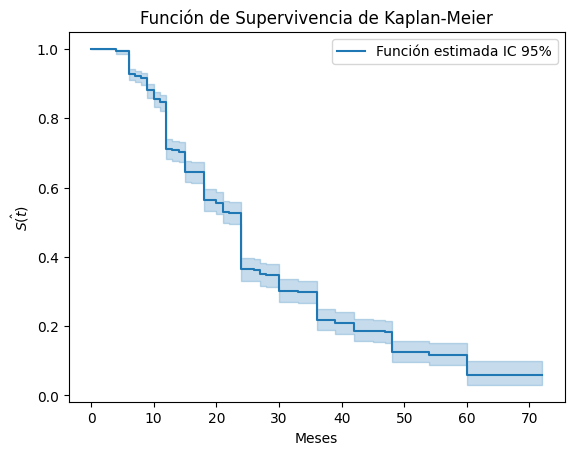

In [159]:
## Gráfica Función de Supervivencia de Kaplan-Meier
km.plot_survival_function(label = 'Función estimada IC 95%')
plt.title('Función de Supervivencia de Kaplan-Meier')
plt.xlabel('Meses')
plt.ylabel('$\hat{S(t)}$')
plt.show()

In [160]:
## Mediana del tiempo (Kaplan-Meier)
mediana_tiempo = km.median_survival_time_
mediana_tiempo

24.0

La mediana es el mes 24, es decir el segundo año, en dónde el 50% de los individuos ya han pagado completamente el préstamos que les proporciono el banco y el resto aun no han terminado de pagarlo. En otras palabras, el 50% de los créditos han sido pagados es de 24.0 meses.

### **10. Construye una variable (por ejemplo, para la del crédito bancario, si debe másde 500 mil 1, y 0 si debe menos), estima y grafica la función de supervivenciapor Kaplan-meierpara cada grupo**

In [161]:
## Vamos a construir una variable donde si el cliente tiene buen historial crediticio (ha pagado todos sus creditos o ha pagado alguno de sus creditos) es igual a 1, y 0 si tiene mal historial crediticio (no ha pagado o se ha retrasado con el pago de alguno de sus creditos) o no tiene historial.
creditos_bil['buen_historial'] = (creditos_bil['hc_pago_todos'] | creditos_bil['hc_pago_algun_credito']).astype(int)
creditos_bil

,meses,cantidad,tasa_de_interes,años_actual_domicilio,edad,numero_creditos,dependientes_economicos,telefono,extranjero,credito_pagado,...,activos_bienes_raices,activos_otro_tipo,activos_seguro_vida,pdp_bancario,casa_prestada,casa_propia,sl_administrativo,sl_gobierno,sl_obrero,buen_historial
0,6,1169,4,4,67,2,1,1,1,1,...,1,0,0,1,0,1,0,1,0,0
1,48,5951,2,2,22,1,1,0,1,0,...,1,0,0,1,0,1,0,1,0,1
2,12,2096,2,3,49,1,2,0,1,1,...,1,0,0,1,0,1,0,0,1,0
3,42,7882,2,4,45,1,2,0,1,1,...,0,0,1,1,1,0,0,1,0,1
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,1,1,...,1,0,0,1,0,1,0,0,1,1
996,30,3857,4,4,40,1,1,1,1,1,...,0,0,1,1,0,1,1,0,0,1
997,12,804,4,4,38,1,1,0,1,1,...,0,1,0,1,0,1,0,1,0,1
998,45,1845,4,4,23,1,1,1,1,0,...,0,0,0,1,1,0,0,1,0,1


In [162]:
## Vamos a separar a las personas con buen historial y mal historial
bh = creditos_bil.query('buen_historial==1')
mh = creditos_bil.query('buen_historial==0')

In [163]:
## Funciones de supervivencia para personas con buen historial y mal historial
km_bh = KaplanMeierFitter().fit(bh['meses'], bh['credito_pagado'])
km_mh = KaplanMeierFitter().fit(mh['meses'], mh['credito_pagado'])

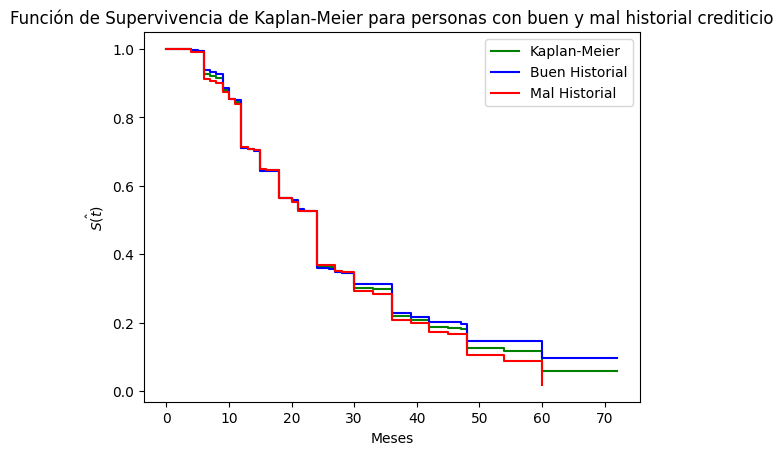

In [164]:
## Graficar para personas con buen historial y mal historial
km.plot_survival_function(label='Kaplan-Meier', color='green', ci_show=False)
km_bh.plot_survival_function(label='Buen Historial', color='blue', ci_show=False)
km_mh.plot_survival_function(label='Mal Historial', color='red', ci_show=False)
plt.title('Función de Supervivencia de Kaplan-Meier para personas con buen y mal historial crediticio')
plt.xlabel('Meses')
plt.ylabel('$\hat{S(t)}$')
plt.show()

En la gráfica función de supervivencia de Kaplan-Meier para personas con buen y mal historial crediticio se puede ver que las personas con buen y mal historial no presentan gran diferencia en el tiempo de pago a comparación de la función de supervivencia de Kaplan-Meier, por lo que podemos decir que el tener buen o mal historial crediticio no tiene diferencias significativas en la velocidad de pago.

### **11. Prueba Si las funciones de supervivencia son distintas usando el log rank test y comenta el resultado**

Prueba de hipótesis (Log Rank Test)

$Ho: S(1)=S(2)$ Funciones de Supervivencia iguales.

$Ha: S(1)\neq S(2)$ Funciones de Supervivencia distintas.

Rechazamos $H_0$ si $P-value<\alpha=0.05$

In [165]:
LRT = logrank_test(bh['meses'], mh['meses'], bh['credito_pagado'], mh['credito_pagado'])
LRT.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.68 0.41      1.29>

In [166]:
LRT.p_value.round(3)

0.409

Como $p-value \nless \alpha$

No rechazamos Ho, las funciones de supervivencia son iguales.

Esto significa que el tener bueno o mal historial crediticio no tienen diferencias significativas en la velocidad de pago, por lo que las personas con buen historial crediticio no tienden a pagar más rápido a comparación de las personas con mal historial.

In [167]:
print('Mediana de tiempo de supervivencia de personas con buen historial crediticio:', km_bh.median_survival_time_, 'meses')
print('Mediana de tiempo de supervivencia de personas con mal historial crediticio:', km_mh.median_survival_time_, 'meses')

Mediana de tiempo de supervivencia de personas con buen historial crediticio: 24.0 meses
Mediana de tiempo de supervivencia de personas con mal historial crediticio: 24.0 meses


La mitad de las deudas por personas con buen historial crediticio y mal historial crediticio son saldadas a los 24 meses, por lo que podemos decir que las personas con buen historial y mal historial no tienen diferencias significativas en la velocidad de pago.

### **12. Ahora estima un modelo de Cox:**

In [168]:
## Estimar el modelo de Cox sin tomar en cuenta la variable recién creada.
creditos_bil = creditos_bil.drop('buen_historial', axis=1)
cph = CoxPHFitter().fit(creditos_bil, 'meses', 'credito_pagado')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -3956.88
         time fit was run = 2023-11-13 12:12:57 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
cantidad                 -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
tasa_de_interes          -0.46       0.63       0.04            -0.54            -0.38                 0.58                 0.69
años_actual_domicilio    -0.01       0.99       0.04            -0.09             0.07                 0.92                 1.07
edad                      0.02       1.02       0.00             0.01             0.02                 1.01                 1.02
numero_creditos           0.07       1.07       0.09            -0.10             0.24                 0.90                 1.27
dependientes_economicos   0.08       1.09       0.11            -0.14             0.31                 0.87                 1.36
telefono                  0.01       1.01       0.09            -0.17             0.18                 0.85                 1.20
extranjero               -1.17       0.31       0.20            -1.55            -0.78                 0.21                 0.46
sc_cero_a_200            -0.46       0.63       0.10            -0.67            -0.26                 0.51                 0.77
sc_mas_de_200            -0.26       0.77       0.16            -0.57             0.05                 0.57                 1.06
sc_menor_a_cero          -0.85       0.43       0.11            -1.07            -0.63                 0.34                 0.53
hc_no_ha_pagado           0.69       1.99       0.28             0.14             1.24                 1.15                 3.44
hc_pago_algun_credito     0.47       1.60       0.28            -0.08             1.01                 0.93                 2.75
hc_pago_retrasado         0.35       1.41       0.30            -0.23             0.93                 0.79                 2.52
hc_pago_todos             0.02       1.02       0.35            -0.67             0.72                 0.51                 2.04
uso_TV                   -0.08       0.92       0.37            -0.81             0.66                 0.44                 1.93
uso_coche_nuevo          -0.16       0.85       0.38            -0.90             0.58                 0.40                 1.78
uso_coche_usado           0.14       1.15       0.39            -0.62             0.91                 0.54                 2.47
uso_colegiaturas         -0.23       0.80       0.42            -1.05             0.59                 0.35                 1.81
uso_mobiliario           -0.00       1.00       0.38            -0.74             0.74                 0.47                 2.10
uso_otros                 0.36       1.44       0.55            -0.71             1.43                 0.49                 4.19
uso_poner_negocio        -0.46       0.63       0.39            -1.23             0.31                 0.29                 1.37
uso_reestructuración      0.93       2.54       0.52            -0.09             1.96                 0.91                 7.09
uso_reparaciones         -0.04       0.96       0.46            -0.94             0.86                 0.39                 2.36
sca_100_a_500             0.01       1.01       0.13            -0.26             0.27                 0.77                 1.31
sca_500_a_1000            0.05       1.05       0.15            -0.25             0.35                 0.78                 1.41
sca_mas_de_1000   

In [169]:
## Mostrar coeficientes
cph.params_

covariate
cantidad                  -0.000404
tasa_de_interes           -0.457991
años_actual_domicilio     -0.008354
edad                       0.016243
numero_creditos            0.067430
dependientes_economicos    0.083637
telefono                   0.007126
extranjero                -1.165332
sc_cero_a_200             -0.462694
sc_mas_de_200             -0.256380
sc_menor_a_cero           -0.851700
hc_no_ha_pagado            0.687272
hc_pago_algun_credito      0.467515
hc_pago_retrasado          0.346315
hc_pago_todos              0.021134
uso_TV                    -0.079314
uso_coche_nuevo           -0.164449
uso_coche_usado            0.140695
uso_colegiaturas          -0.227066
uso_mobiliario            -0.001323
uso_otros                  0.362647
uso_poner_negocio         -0.455946
uso_reestructuración       0.932728
uso_reparaciones          -0.043443
sca_100_a_500              0.006574
sca_500_a_1000             0.046987
sca_mas_de_1000            0.041409
at_1_a_4          

In [170]:
## Mostrar exp(coef)
cph.hazard_ratios_

covariate
cantidad                   0.999596
tasa_de_interes            0.632553
años_actual_domicilio      0.991681
edad                       1.016376
numero_creditos            1.069755
dependientes_economicos    1.087234
telefono                   1.007152
extranjero                 0.311819
sc_cero_a_200              0.629585
sc_mas_de_200              0.773848
sc_menor_a_cero            0.426689
hc_no_ha_pagado            1.988284
hc_pago_algun_credito      1.596024
hc_pago_retrasado          1.413849
hc_pago_todos              1.021359
uso_TV                     0.923750
uso_coche_nuevo            0.848361
uso_coche_usado            1.151073
uso_colegiaturas           0.796868
uso_mobiliario             0.998678
uso_otros                  1.437128
uso_poner_negocio          0.633848
uso_reestructuración       2.541433
uso_reparaciones           0.957487
sca_100_a_500              1.006596
sca_500_a_1000             1.048109
sca_mas_de_1000            1.042279
at_1_a_4          

**a) A parte de “tasa de interes” y “cantidad”, elige otras cuatro variables que creas que afectan el riesgo del evento.**

Las variables "edad", "extranjero", "saldo_cuenta" ("sc_cero_a_200", "sc_mas_de_200" y "sc_menor_a_cero") y "historia_crediticia" ("hc_no_ha_pagado", "hc_pago_algun_credito", "hc_pago_retrasado" y "hc_pago_todos") son las elegidas, debido a que son las variables que afectan de manera significativa al riesgo

**b) Di si cada una de las 6 variables que elegiste, aumentan/disminuyen el riesgo del evento y por qué**

### Interpretción del modelo

$H_0:$ No tienen efeto las variables en el evento\
$H_A:$ Tienen efeto las variables en el evento

Rechazamos $H_0$ si $P-value < \alpha=0.05$

Las variable **sc_mas_de_200**, **hc_pago_algun_credito**, **hc_pago_retrasado** y **hc_pago_todos** no tienen efecto en el riesgo de pagar completamente el préstamo, debido a que $p-value \nless \alpha$.
* **tasa_de_interes**: $p-value < \alpha$. Se rechaza Ho, por lo que la tasa de interés reduce el riesgo de que el cliente pague completamente el préstamo. (1 - 0.63) = 0.37. La tasa de interés asignada disminuye el riesgo de pagar completamente el préstamo en un 37%.

* **cantidad**: $p-value < \alpha$. Se rechaza Ho, por lo que el monto del préstamo otorgado al cliente reduce el riesgo de que este pague el préstamo completamente. (1 - 0.99) = 0.01. El monto del préstamo otorgado al cliente disminuye el riesgo de pagar completamente el préstamo en un 1%.

* **edad**: $p-value < \alpha$. Se rechaza Ho, por lo que la edad del cliente incrementa el riesgo de que este pague el préstamo completamente. (1.02 - 1) = 0.02. La edad del cliente aumenta el riesgo de pagar completamente el préstamo en un 2%.

* **extranjero**: $p-value < \alpha$. Se rechaza Ho, por lo que el cliente sea extranjero reduce el riesgo de que este pague completamente el préstamo. (1 - 0.31) = 0.69. Que el cliente sea extranjero disminuye el riesgo de pagar completamente el préstamo en un 69%.

* **sc_cero_a_200**: $p-value < \alpha$. Se rechaza Ho, por lo que el cliente tenga un saldo en la cuenta de entre 0 y 200 euros reduce el riesgo de que este pague completamente el préstamo. (1 - 0.63) = 0.37. Que el cliente tenga un saldo en la cuenta de entre 0 a 200 disminuye el riesgo de pagar completamente el préstamo en un 37% a comparación de no tener una cuenta con el banco.

* **sc_menor_a_cero**: $p-value < \alpha$. Se rechaza Ho, por lo que el cliente tenga un saldo en la cuenta menor a cero reduce el riesgo de que este pague completamente el préstamo. (1 - 0.43) = 0.57. Que el cliente tenga un saldo en la cuenta menor a cero disminuye el riesgo de pagar completamente el préstamo en un 57% a comparación de no tener una cuenta con el banco.

* **hc_no_ha_pagado**: $p-value < \alpha$. Se rechaza Ho, por lo que el cliente tenga un mal historial crediticio (no haber pagado) incrementa el riesgo de que este pague completamente el préstamo. (1.99 - 1) = 0.99. Que el cliente tenga un mal historial crediticio (no haber pagado) aumenta el riesgo de pagar completamente el préstamo en un 99% a comparación de un cliente que no haya tenido creditos.

**c) Realiza las transformaciones adecuadas para utilizar las variables en un modelo de cox**

In [171]:
## Elegimos las variables de "edad", "extranjero", "saldo_cuenta" ("sc_cero_a_200", "sc_mas_de_200" y "sc_menor_a_cero") y "historia_crediticia" ("hc_no_ha_pagado", "hc_pago_algun_credito", "hc_pago_retrasado" y "hc_pago_todos")
data = creditos_bil[['meses', 'cantidad', 'tasa_de_interes', 'edad', 'extranjero', 'sc_cero_a_200', 'sc_mas_de_200', 'sc_menor_a_cero', 'hc_no_ha_pagado', 'hc_pago_algun_credito', 'hc_pago_retrasado', 'hc_pago_todos', 'credito_pagado']]
data

,meses,cantidad,tasa_de_interes,edad,extranjero,sc_cero_a_200,sc_mas_de_200,sc_menor_a_cero,hc_no_ha_pagado,hc_pago_algun_credito,hc_pago_retrasado,hc_pago_todos,credito_pagado
0,6,1169,4,67,1,0,0,1,1,0,0,0,1
1,48,5951,2,22,1,1,0,0,0,1,0,0,0
2,12,2096,2,49,1,0,0,0,1,0,0,0,1
3,42,7882,2,45,1,0,0,1,0,1,0,0,1
4,24,4870,3,53,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,31,1,0,0,0,0,1,0,0,1
996,30,3857,4,40,1,0,0,1,0,1,0,0,1
997,12,804,4,38,1,0,0,0,0,1,0,0,1
998,45,1845,4,23,1,0,0,1,0,1,0,0,0


**d) Estima un modelo de cox con las variables elegidas e interpreta los coeficientes**

In [172]:
## Estimar el modelo de Cox
cph_data = CoxPHFitter().fit(data, 'meses', 'credito_pagado')
cph_data.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -3983.46
         time fit was run = 2023-11-13 12:12:59 UTC

---
                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                     
cantidad               -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
tasa_de_interes        -0.46       0.63       0.04            -0.53            -0.38                 0.59                 0.68
edad                    0.01       1.01       0.00             0.01             0.02                 1.01                 1.02
extranjero             -1.27       0.28       0.19            -1.64            -0.90                 0.19                 0.41
sc_cero_a_200          -0.47       0.63       0.10            -0.66            -0.28                 0.52                 0.76
sc_mas_de_200          -0.29       0.75       0.15            -0.59             0.01                 0.55                 1.01
sc_menor_a_cero        -0.83       0.44       0.10            -1.03            -0.62                 0.36                 0.54
hc_no_ha_pagado         0.82       2.26       0.27             0.29             1.35                 1.33                 3.84
hc_pago_algun_credito   0.56       1.74       0.27             0.03             1.08                 1.03                 2.94
hc_pago_retrasado       0.37       1.45       0.29            -0.19             0.94                 0.82                 2.57
hc_pago_todos          -0.05       0.95       0.34            -0.72             0.62                 0.49                 1.85

                        cmp to      z      p   -log2(p)
covariate                                              
cantidad                  0.00 -16.25 <0.005     194.80
tasa_de_interes           0.00 -12.04 <0.005     108.46
edad                      0.00   3.96 <0.005      13.71
extranjero                0.00  -6.79 <0.005      36.37
sc_cero_a_200             0.00  -4.78 <0.005      19.09
sc_mas_de_200             0.00  -1.87   0.06       4.03
sc_menor_a_cero           0.00  -8.01 <0.005      49.66
hc_no_ha_pagado           0.00   3.02 <0.005       8.64
hc_pago_algun_credito     0.00   2.08   0.04       4.75
hc_pago_retrasado         0.00   1.29   0.20       2.35
hc_pago_todos             0.00  -0.16   0.87       0.19
---
Concordance = 0.79
Partial AIC = 7988.92
log-likelihood ratio test = 571.85 on 11 df
-log2(p) of ll-ratio test = 381.47

In [173]:
## Mostrar coeficientes
cph_data.params_

covariate
cantidad                -0.000390
tasa_de_interes         -0.455295
edad                     0.013819
extranjero              -1.270530
sc_cero_a_200           -0.467929
sc_mas_de_200           -0.289429
sc_menor_a_cero         -0.825141
hc_no_ha_pagado          0.816224
hc_pago_algun_credito    0.555873
hc_pago_retrasado        0.374713
hc_pago_todos           -0.054291
Name: coef, dtype: float64

In [174]:
## Mostrar exp(coef)
cph_data.hazard_ratios_

covariate
cantidad                 0.999610
tasa_de_interes          0.634261
edad                     1.013915
extranjero               0.280683
sc_cero_a_200            0.626298
sc_mas_de_200            0.748691
sc_menor_a_cero          0.438173
hc_no_ha_pagado          2.261943
hc_pago_algun_credito    1.743462
hc_pago_retrasado        1.454574
hc_pago_todos            0.947156
Name: exp(coef), dtype: float64

### Interpretción del modelo

$H_0:$ No tienen efeto las variables en el evento\
$H_A:$ Tienen efeto las variables en el evento

Rechazamos $H_0$ si $P-value < \alpha=0.05$

Las variable **sc_mas_de_200**, **hc_pago_retrasado** y **hc_pago_todos** no tienen efecto en el riesgo de pagar completamente el préstamo, debido a que $p-value \nless \alpha$.

* **tasa_de_interes**: $p-value < \alpha$. Se rechaza Ho, por lo que la tasa de interés reduce el riesgo de que el cliente pague completamente el préstamo. (1 - 0.63) = 0.37. La tasa de interés asignada disminuye el riesgo de pagar completamente el préstamo en un 37%.

* **cantidad**: $p-value < \alpha$. Se rechaza Ho, por lo que el monto del préstamo otorgado al cliente reduce el riesgo de que este pague el préstamo completamente. (1 - 0.99) = 0.01. El monto del préstamo otorgado al cliente disminuye el riesgo de pagar completamente el préstamo en un 1%.

* **edad**: $p-value < \alpha$. Se rechaza Ho, por lo que la edad del cliente incrementa el riesgo de que este pague el préstamo completamente. (1.01 - 1) = 0.01. La edad del cliente aumenta el riesgo de pagar completamente el préstamo en un 1%.

* **extranjero**: $p-value < \alpha$. Se rechaza Ho, por lo que el cliente sea extranjero reduce el riesgo de que este pague completamente el préstamo. (1 - 0.28) = 0.69. Que el cliente sea extranjero disminuye el riesgo de pagar completamente el préstamo en un 69%.

* **sc_cero_a_200**: $p-value < \alpha$. Se rechaza Ho, por lo que el cliente tenga un saldo en la cuenta de entre 0 y 200 euros reduce el riesgo de que este pague completamente el préstamo. (1 - 0.63) = 0.37. Que el cliente tenga un saldo en la cuenta de entre 0 a 200 disminuye el riesgo de pagar completamente el préstamo en un 37% a comparación de no tener una cuenta con el banco.

* **sc_menor_a_cero**: $p-value < \alpha$. Se rechaza Ho, por lo que el cliente tenga un saldo en la cuenta menor a cero reduce el riesgo de que este pague completamente el préstamo. (1 - 0.44) = 0.56. Que el cliente tenga un saldo en la cuenta menor a cero disminuye el riesgo de pagar completamente el préstamo en un 56% a comparación de no tener una cuenta con el banco.

* **hc_no_ha_pagado**: $p-value < \alpha$. Se rechaza Ho, por lo que el cliente tenga un mal historial crediticio (no haber pagado) incrementa el riesgo de que este pague completamente el préstamo. (2.26 - 1) = 1.26. Que el cliente tenga un mal historial crediticio (no haber pagado) aumenta el riesgo de pagar completamente el préstamo en un 126% a comparación de un cliente que no haya tenido creditos.

* **hc_pago_algun_credito**: $p-value < \alpha$. Se rechaza Ho, por lo que el cliente tenga un historial crediticio regular (haber pagado algún crédito) incrementa el riesgo de que este pague completamente el préstamo. (1.74 - 1) = 0.74. Que el cliente tenga un historial crediticio regular (haber pagado algún crédito) aumenta el riesgo de pagar completamente el préstamo en un 74% a comparación de un cliente que no haya tenido creditos.

### **13. Interpreta cada uno de los coeficientes obtenidos.Utiliza cph.plot()para ayudarte con la interpretación.**

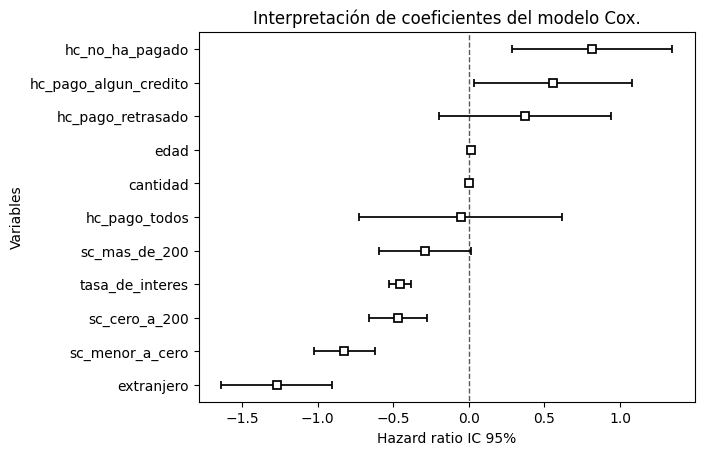

In [175]:
## Mostra gráfico de coeficientes
cph_data.plot()
plt.title('Interpretación de coeficientes del modelo Cox.')
plt.ylabel('Variables')
plt.xlabel('Hazard ratio IC 95%')
plt.show()

De acuerdo con el gráfico podemos observar que las varibales "hc_no_ha_pagado", "hc_pago_algun_credito" y "edad" aumentan el riesgo de que paguen el préstamos del banco, ya que estas variables estan del lado positivo de la gráfica. Por último las varibales "cantidad", "tasa_de_interes", "sc_cero_a_200", "sc_menor_a_cero" y "extranjero" disminuyen el riesgo de que se pague en préstamo del banco. Sin embargo, es importante que no olvidemos que estas variables tienen ntervalos de confianza y debido a ello pueden cambiar la interpretación de los datos; en el caso de "hc_pago_retrasado", "hc_pago_todos" y "sc_mas_de_200" son variables que toman un HR de 0 y debido a ello no tienen efecto en el riesgo de que los clientes paguen el préstamo del banco.

Este gráfico nos ayuda a distinguir de manera visual cuales son las variables que aumentan o disminuyen el riesgo del evento, o simplemente que no tienen efecto en este.

### **14. Con base en los cálculos realizados, redacta un comentario integral de por lo menos 250 palabras que resuma el análisis, reflexiones y recomendaciones sobre la política de otorgamiento de créditos en el Banco de la Ilusión.**

En base a las pruebas de hipótesis y el análisis de regresión de Cox, se han obtenido resultados significativos sobre los factores que influyen en el riesgo de pagar completamente un préstamo en el Banco de la Ilusión. A continuación, se presentan las conclusiones clave y las recomendaciones para la política de otorgamiento de créditos:

**Variables que Afectan Positivamente el Riesgo:**

**Edad:** A medida que la edad del cliente aumenta, hay un leve aumento del 1% en el riesgo de pagar completamente el préstamo. Es importante considerar medidas adicionales para evaluar la capacidad de pago en función de la edad.\
**Historial Crediticio:** Los clientes que no han pagado anteriormente tienen un riesgo 126% mayor de pagar el préstamo completamente en comparación con clientes sin historial crediticio, mientras que aquellos que han pagado algunos créditos tienen un riesgo 74% mayor. Se debe tener precaución al otorgar préstamos a clientes con historial crediticio problemático, sin embargo es importante tomar en cuenta a clientes con experiencia previa debido que los clientes sin historial crediticio pueden representar un riesgo desconocido. Se recomienda implementar políticas específicas para evaluar la solvencia de estos solicitantes.

**Variables que Afectan Negativamente el Riesgo:**

**Tasa de Interés:** Un aumento en la tasa de interés asignada reduce el riesgo de pagar completamente el préstamo en un 37%. Es importante considerar estrategias de fijación de tasas de interés competitivas para mitigar el riesgo.\
**Cantidad del Préstamo:** Cuantos mayores sean los montos del préstamo, menor es el riesgo de pago. Cada aumento del 1% en el monto del préstamo reduce el riesgo en un 1%. Se podría considerar ofrecer límites de préstamo adecuados basados en el historial crediticio y la capacidad de pago del cliente.\
**Saldo en la Cuenta:** Clientes con saldos en la cuenta entre 0 y 200 euros tienen un riesgo un 37% menor de pagar completamente el préstamo en comparación con clientes sin cuenta en el banco. Además, aquellos con saldos menores a cero tienen un riesgo un 56% menor. La existencia de cuentas y saldos positivos se correlaciona con una mayor probabilidad de pago completo del préstamo.\
**Clientes Extranjeros:** Los clientes extranjeros tienen un riesgo un 69% menor de pagar completamente el préstamo. Esto sugiere que la nacionalidad extranjera debe considerarse como un factor de riesgo significativo en el proceso de otorgamiento de créditos.

**Recomendaciones para la Política de Otorgamiento de Créditos:**

**Evaluar Rigurosamente el Historial Crediticio:** Dada la influencia significativa del historial crediticio, se recomienda una evaluación exhaustiva de los antecedentes crediticios de los solicitantes.\
**Considerar Tasas de Interés Competitivas:** Mantener tasas de interés competitivas puede ser una estrategia eficaz para incentivar el pago completo de los préstamos.\
**Establecer Límites de Préstamo Adecuados:** Basar los límites de préstamo en la capacidad de pago del cliente y su historial crediticio puede reducir el riesgo de incumplimiento.\
**Fomentar la Actividad Bancaria:** Los saldos en cuentas bancarias se correlacionan con un menor riesgo de pago. Fomentar la apertura y actividad en cuentas bancarias puede ser beneficioso.

### **15. Por último, investiga y señala las limitaciones de Kaplan-Meier y del modelo de Cox.**

Las limitaciones del método de Kaplan-Meier y del modelo de Cox son las siguientes:

**Método de Kaplan-Meier:**

- **Censura no informativa:** Este método asume que la censura es no informativa, es decir, que la censura y el tiempo de supervivencia son independientes. Si esta suposición no se cumple, los resultados pueden estar sesgados.
- **Suposición de riesgos constantes en el tiempo:** Se asume que las probabilidades para el evento de interés dependen solo del tiempo transcurrido desde el evento inicial (son estables con respecto al tiempo absoluto). Si esta suposición no se cumple, los resultados pueden estar sesgados.
- **No considera covariables:** El método de Kaplan-Meier no puede manejar covariables. Si se desea incluir covariables en el análisis, se deben utilizar otros métodos, como el modelo de Cox.
- **Igualdad de funciones de supervivencia:** Kaplan-Meier asume que las funciones de supervivencia de diferentes grupos son iguales hasta que ocurre un evento. Esto puede no ser cierto en todos los casos.
- **Sesgo por selección:** Si la muestra no es representativa o sujeta a sesgos de selección, los resultados de Kaplan-Meier pueden no generalizarse fácilmente.

**Modelo de Cox:**

- **Suposición de riesgos proporcionales:** Este modelo asume que los riesgos son proporcionales y constantes en el tiempo. Si esta suposición no se cumple, los resultados pueden estar sesgados.
- **Observaciones independientes:** El modelo de Cox asume que las observaciones son independientes. Si existen correlaciones entre las observaciones, los resultados pueden estar sesgados.
- **Complejidad computacional:** Aunque es popular en el análisis de supervivencia, la regresión de Cox puede ser difícil de entender y requiere varios cálculos técnicos, incluidas numerosas multiplicaciones e inversiones de matrices
- **Linealidad de covariables:** Supone que las covariables tienen una relación lineal con el logaritmo del riesgo. Si esta relación no es lineal, podría haber sesgo en las estimaciones.
- **Colinealidad:** La presencia de colinealidad entre las covariables puede dificultar la interpretación de los coeficientes y conducir a estimaciones poco fiables.
- **Datos censurados no informativos:** Si la censura no proporciona información sobre el riesgo, el Modelo de Cox puede subestimar la variabilidad y dar lugar a intervalos de confianza demasiado estrechos.